# Exploratory Data Analysis
Data set being used is Minds14 from https://huggingface.co/datasets/PolyAI/minds14

In [3]:
!pip -q install datasets

In [4]:
from datasets import load_dataset, load_from_disk

In [5]:
minds_14 = load_dataset("PolyAI/minds14", "en-US")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
import os
minds_14.save_to_disk(os.path.join("/content", "minds_14.hf"))

Saving the dataset (0/2 shards):   0%|          | 0/8168 [00:00<?, ? examples/s]

In [17]:
# Print the dataset structure
print(minds_14)

# Display the first few samples
print(minds_14['train'][0])


DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 563
    })
})
{'path': '/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav', 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav', 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
        0.        ,  0.        ]), 'sampling_rate': 8000}, 'transcription': 'I would like to set up a joint account with my partner', 'english_transcription': 'I would like to set up a joint account with my partner', 'intent_class': 11, 'lang_id': 4}


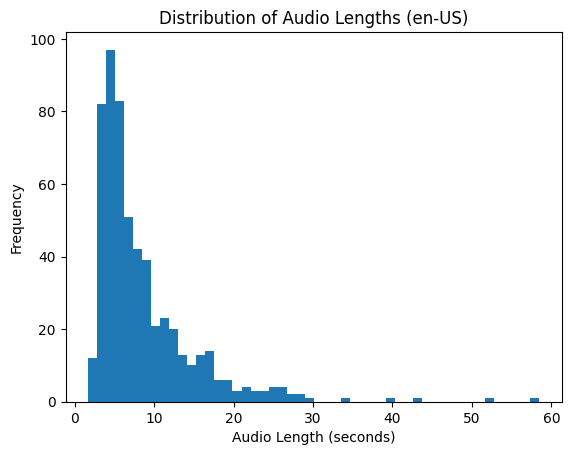

In [22]:
# @title Audio Length Distribution
import matplotlib.pyplot as plt

audio_lengths = []
for sample in minds_14['train']:
    audio_length = len(sample['audio']['array']) / sample['audio']['sampling_rate']
    audio_lengths.append(audio_length)

plt.hist(audio_lengths, bins=50)
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Lengths (en-US)')
plt.show()

### Distribution of Audio Lengths

The histogram above illustrates the distribution of audio lengths in the MINDS14 dataset. Here are the key observations:

1. **Majority of Audio Samples are Short**: The majority of the audio samples are less than 10 seconds long, with a peak around 5 seconds.
2. **Exponential Decay**: There is an exponential decay in the frequency of samples as the audio length increases. Beyond 10 seconds, the number of samples decreases significantly.
3. **Long Tail**: There is a long tail in the distribution with some samples extending up to 70 seconds, although these are relatively rare.
4. **Model Training Implications**: The skewed distribution towards shorter audio samples suggests that the model needs to be robust enough to handle a variety of audio lengths. Padding or truncating audio samples during preprocessing may be necessary.
5. **Data Balancing**: The imbalance in audio lengths may require data balancing techniques to ensure the model is not biased towards shorter samples.

Understanding these characteristics is crucial for preparing the dataset and training the model effectively.


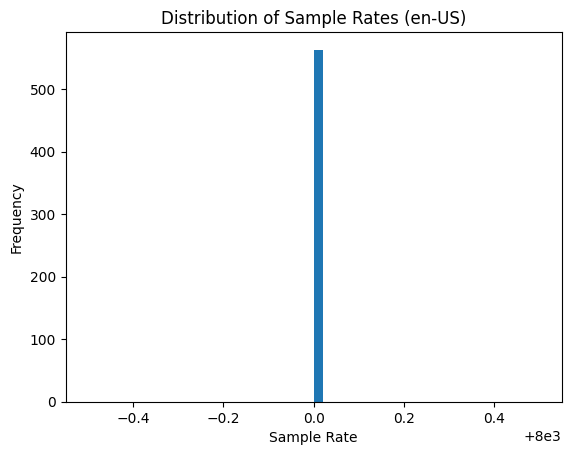

In [23]:
# @title Sample Rates Distribution
sample_rates = [sample['audio']['sampling_rate'] for sample in minds_14['train']]

plt.hist(sample_rates, bins=50)
plt.xlabel('Sample Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Rates (en-US)')
plt.show()

In [20]:
# Extract the sample rate from one of the audio samples
sample_rate = minds_14['train'][0]['audio']['sampling_rate']
print(f"Sample Rate: {sample_rate} Hz")


Sample Rate: 8000 Hz


### Distribution of Sample Rates

The histogram above illustrates the distribution of sample rates in the MINDS14 dataset. Here are the key observations:

1. **Single Sample Rate**: All audio samples in the dataset have the same sample rate, indicated by the single spike in the histogram.
2. **Standardization**: The uniform sample rate across all samples simplifies preprocessing and model training, as there is no need to handle multiple sample rates.
3. **Common Sample Rate**: standard sample rate of 8000Hz is commonly used in the dataset.
4. **Model Training Implications**: The consistency in sample rates ensures that all audio data is processed uniformly, leading to more stable and reliable model performance.

Understanding these characteristics is crucial for preparing the dataset and training the model effectively.


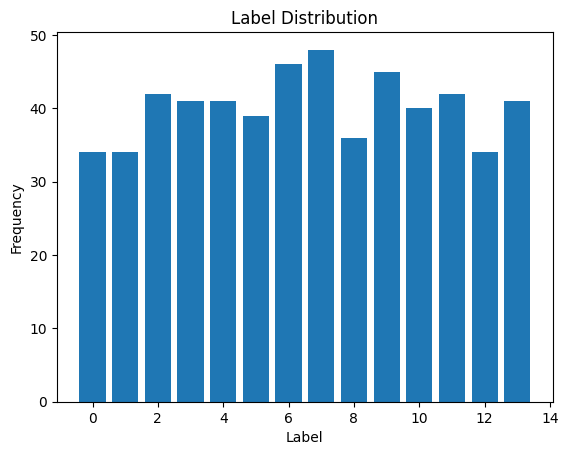

In [21]:
# @title Label Distribution
from collections import Counter

labels = [sample['intent_class'] for sample in minds_14['train']]
label_counter = Counter(labels)

plt.bar(label_counter.keys(), label_counter.values())
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()

### Label Distribution for en-US Language

The bar chart above shows the distribution of labels (intents) in the MINDS14 dataset specifically for the en-US language. Here’s a friendly breakdown of what we can see:

1. **Fairly Even Spread**: The labels are fairly evenly distributed, which is great news for our model training. This means the model won’t favor one label too much over the others, leading to more balanced predictions.
2. **Minor Differences**: There are some minor differences in the number of samples per label. For example, label `6` has the highest frequency with almost 50 samples, while labels `0` and `1` have around 35 samples each.
3. **14 Intents**: Just like the full dataset, this subset also includes 14 different intents, ranging from `0` to `13`. Our model will need to learn to differentiate between these 14 intents effectively.


In [24]:
# @title Let's hear some Audio Samples
import IPython.display as ipd

for i in range(3):
    audio_array = minds_14['train'][i]['audio']['array']
    sampling_rate = minds_14['train'][i]['audio']['sampling_rate']
    print(f"Sample {i+1}:")
    ipd.display(ipd.Audio(audio_array, rate=sampling_rate))

Sample 1:


Sample 2:


Sample 3:


In [26]:
# @title Let's hear some Audio Samples and show Transcriptions
import IPython.display as ipd

# Display audio samples and their transcriptions
for i in range(3):
    sample = minds_14['train'][i]
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    transcription = sample['transcription']
    eng_transcription = sample['english_transcription']

    print(f"Sample {i+1}:")
    ipd.display(ipd.Audio(audio_array, rate=sampling_rate))
    print("Transcription:", transcription)
    print("English Transcription:", eng_transcription)


Sample 1:


Transcription: I would like to set up a joint account with my partner
English Transcription: I would like to set up a joint account with my partner
Sample 2:


Transcription: Henry County set up a joint account with my wife and where are they at
English Transcription: Henry County set up a joint account with my wife and where are they at
Sample 3:


Transcription: hi I'd like to set up a joint account with my partner I'm not seeing the option to do it on the app so I called in to get some help can I do it over the phone with you and give you the information
English Transcription: hi I'd like to set up a joint account with my partner I'm not seeing the option to do it on the app so I called in to get some help can I do it over the phone with you and give you the information


# Testing out Whisper Model



In [7]:
!pip install -q torchaudio

In [1]:
!pip install -q git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-c53zspvg
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-c53zspvg
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
# @title Comparing transcripton from Whisper vs Dataset

!pip install git+https://github.com/openai/whisper.git
!pip install torchaudio

import whisper
import IPython.display as ipd
import torchaudio
import torch

# Load the Whisper model
model = whisper.load_model("base")

# Function to transcribe audio using Whisper
def transcribe_audio_with_whisper(audio_array, sampling_rate):
    # Save the audio array to a temporary file
    temp_audio_path = "temp_audio.wav"
    # Convert numpy array to torch tensor and unsqueeze to add batch dimension
    audio_tensor = torch.tensor(audio_array).unsqueeze(0)
    torchaudio.save(temp_audio_path, audio_tensor, sampling_rate)
    # Transcribe the audio file using Whisper
    result = model.transcribe(temp_audio_path)
    return result["text"]

# Display audio samples, provided transcriptions, and Whisper transcriptions
for i in range(3):
    sample = minds_14['train'][i]
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    provided_transcription = sample['transcription']

    # Transcribe using Whisper
    whisper_transcription = transcribe_audio_with_whisper(audio_array, sampling_rate)

    # Display results
    print(f"Sample {i+1}:")
    ipd.display(ipd.Audio(audio_array, rate=sampling_rate))
    print("Provided Transcription:", provided_transcription)
    print("Whisper Transcription:", whisper_transcription)
    print()


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-75hu3djf
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-75hu3djf
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sample 1:


Provided Transcription: I would like to set up a joint account with my partner
Whisper Transcription:  I would like to set up a joint account with my partner. How do I proceed with doing that?



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sample 2:


Provided Transcription: Henry County set up a joint account with my wife and where are they at
Whisper Transcription:  wondering how I would set up a joint to hell with my wife and where the app might be.



/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Sample 3:


Provided Transcription: hi I'd like to set up a joint account with my partner I'm not seeing the option to do it on the app so I called in to get some help can I do it over the phone with you and give you the information
Whisper Transcription:  Hi, I'd like to set up a joint account with my partner. I'm not seeing the option to do it on the app, so I called in to get some help. Can I just do it over the phone with you and give you the information? Should I do it in the app and I'm missing something? Okay, I'd prefer to just do it over the phone if possible, thanks.



**Analysis**


*   With the sample audio, we can see that the included transcriptions that is in the dataset does not accurately represent the audio itself
*   Instead, the Whisper model as-is does the transcription job a lot better
*   This is concerning because if we are to fine-tune the Whisper model, there is a possibility that it would be worst off.



In [12]:
!pip install scikit-learn

In [ ]:
# @title Calculate metrics of Whisper transcription (without Fine Tuning)

import whisper
import torchaudio
import torch
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the Whisper model
model = whisper.load_model("base")

# Function to transcribe audio using Whisper
def transcribe_audio_with_whisper(audio_array, sampling_rate):
    # Save the audio array to a temporary file
    temp_audio_path = "temp_audio.wav"
    # Convert numpy array to torch tensor and unsqueeze to add batch dimension
    audio_tensor = torch.tensor(audio_array).unsqueeze(0)
    torchaudio.save(temp_audio_path, audio_tensor, sampling_rate)
    # Transcribe the audio file using Whisper
    result = model.transcribe(temp_audio_path)
    return result["text"]

# List to store results
true_transcriptions = []
pred_transcriptions = []

# Transcribe the entire dataset
for sample in minds_14['train']:
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    provided_transcription = sample['transcription']

    # Transcribe using Whisper
    whisper_transcription = transcribe_audio_with_whisper(audio_array, sampling_rate)

    # Store results
    true_transcriptions.append(provided_transcription)
    pred_transcriptions.append(whisper_transcription)

    # Print progress
    if len(true_transcriptions) % 100 == 0:
        print(f"Processed {len(true_transcriptions)} samples")

print("Transcription completed.")

# Convert transcriptions to binary format for comparison
true_labels = [1 if true_transcription == pred_transcription else 0 for true_transcription, pred_transcription in zip(true_transcriptions, pred_transcriptions)]
pred_labels = [1] * len(true_labels)  # Since we are comparing directly, all predictions are considered positive (1)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/